In [2]:
import pandas as pd

In [3]:
# creating a series

s = pd.Series([2,-1,3,5])
print(s)

0    2
1   -1
2    3
3    5
dtype: int64


In [4]:
# series are similar to numpy arrays
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [6]:
s + 1000
# what happening here

0    1002
1     999
2    1003
3    1005
dtype: int64

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [10]:
print(s)
print(s + 1000)

0    2
1   -1
2    3
3    5
dtype: int64
0    1002
1     999
2    1003
3    1005
dtype: int64


In [12]:
# index labels
s2 = pd.Series([68,83,112,68], index=["alice", "bob", "charles", "damien"])
s2

alice       68
bob         83
charles    112
damien      68
dtype: int64

In [15]:
s2.loc["bob"]

83

In [16]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [17]:
s.iloc[0]

2

In [21]:
# init from dict

weights = {"weight":1, "height":2}
s3 = pd.Series(weights, index=["weight"])

In [22]:
s3

weight    1
dtype: int64

In [23]:
# automatic alignment

s3 = pd.Series(weights)
jiggs = {"height":4, "weight":5}
s4 = pd.Series(jiggs)

s3 + s4

height    6
weight    6
dtype: int64

In [24]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [3]:
#series name
# a series canhave a name

s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

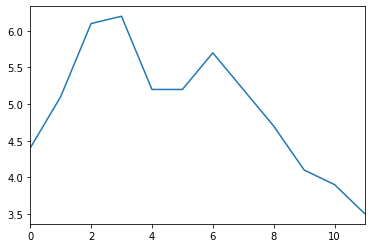

In [4]:
# plotting a series
%matplotlib inline
import matplotlib.pyplot as plt
tempratures = [4.4,5.1,6.1,6.2,5.2,5.2,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(tempratures, name="Temprature")
s7.plot()
plt.show()


In [6]:
### Handling time

## time range

dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [7]:
temp_series = pd.Series(tempratures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    5.2
2016-10-29 22:30:00    5.2
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

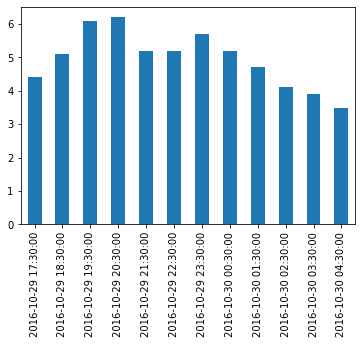

In [10]:
temp_series.plot(kind="bar")


plt.show()

In [11]:
# resampling

temp_series_freq_2H = temp_series.resample("2H")
# to resample at 2 hrs
temp_series_freq_2H

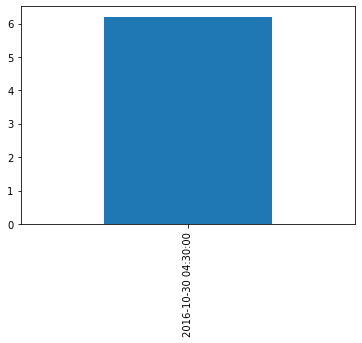

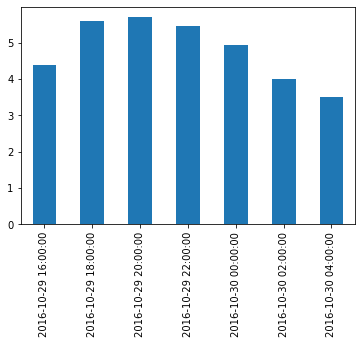

In [14]:
# resamplingoperation is actually a deffered operation, which is why we did not get a seris
# object but a datetimeindexresampler object

temp_series_freq_2H_mean = temp_series_freq_2H.mean()
# mean resamples by taking mean of both values

temp_series_freq_2H.plot(kind="bar")
plt.show()

temp_series_freq_2H_mean.plot(kind="bar")
plt.show()

In [15]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    5.2
2016-10-29 22:00:00    5.2
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [17]:
import numpy as np

temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
# will apply np.min operations for resampling every 2 hrs
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    5.2
2016-10-29 22:00:00    5.2
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [18]:
# upsampling and interpolation

temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [19]:
# we can ill the gap by interpolating
# we can use lnear interpolation, but we can also select another 
# like cubic interpolation

temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.477865
2016-10-29 18:00:00    4.633631
2016-10-29 18:15:00    4.847582
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.371168
2016-10-29 19:00:00    5.641369
2016-10-29 19:15:00    5.890885
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.249963
Freq: 15T, dtype: float64

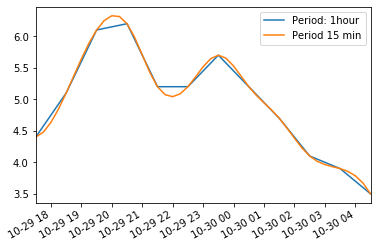

In [20]:
temp_series.plot(label="Period: 1hour")
temp_series_freq_15min.plot(label="Period 15 min")
plt.legend()
plt.show()

In [22]:
# Timezones

temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny


2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    5.2
2016-10-29 22:30:00-04:00    5.2
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

In [23]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    5.2
2016-10-30 03:30:00+01:00    5.2
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

In [24]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    5.2
2016-10-30 03:30:00    5.2
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

In [26]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from %r, try using the 'ambiguous' argument


In [27]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    5.2
2016-10-30 03:30:00+01:00    5.2
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

In [28]:
#perids
quarters = pd.period_range('2016Q1', periods=3, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [29]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2'], dtype='period[Q-DEC]', freq='Q-DEC')

In [30]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09'], dtype='period[M]', freq='M')

In [31]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07'], dtype='period[M]', freq='M')

In [32]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016'], dtype='period[A-DEC]', freq='A-DEC')

In [43]:
try:
    quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
    quarterly_revenue
    quarterly_revenue.plot(kind="line")
    plt.show()
except Exception as e:
    print(e)

Length of passed values is 8, index implies 3


In [45]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')